In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [549]:
from sklearn.linear_model import LinearRegression 

from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import shap
shap.initjs()

In [550]:
train = pd.read_csv('C:/Users/hugod/Downloads/Dados/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('C:/Users/hugod/Downloads/Dados/store-sales-time-series-forecasting/test.csv')
stores = pd.read_csv('C:/Users/hugod/Downloads/Dados/store-sales-time-series-forecasting/stores.csv')
oil = pd.read_csv('C:/Users/hugod/Downloads/Dados/store-sales-time-series-forecasting/oil.csv')
holidays = pd.read_csv('C:/Users/hugod/Downloads/Dados/store-sales-time-series-forecasting/holidays_events.csv')
transactions = pd.read_csv('C:/Users/hugod/Downloads/Dados/store-sales-time-series-forecasting/transactions.csv')

In [551]:
def infos(dataset):
    return dataset.head(), dataset.info(), dataset.describe()

In [552]:
infos(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 137.4+ MB


(   id        date  store_nbr      family  sales  onpromotion
 0   0  2013-01-01          1  AUTOMOTIVE    0.0          0.0
 1   1  2013-01-01          1   BABY CARE    0.0          0.0
 2   2  2013-01-01          1      BEAUTY    0.0          0.0
 3   3  2013-01-01          1   BEVERAGES    0.0          0.0
 4   4  2013-01-01          1       BOOKS    0.0          0.0,
 None,
                  id     store_nbr         sales   onpromotion
 count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
 mean   1.500444e+06  2.750000e+01  3.577757e+02  3.460289e+01
 std    8.662819e+05  1.558579e+01  1.101998e+03  9.948216e+01
 min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
 25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
 50%    1.500444e+06  2.750000e+01  1.100000e+01  1.000000e+00
 75%    2.250665e+06  4.100000e+01  1.958473e+02  1.600000e+01
 max    3.000887e+06  5.400000e+01  1.247170e+05  1.006000e+03)

In [553]:
infos(stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


(   store_nbr           city                           state type  cluster
 0          1          Quito                       Pichincha    D       13
 1          2          Quito                       Pichincha    D       13
 2          3          Quito                       Pichincha    D        8
 3          4          Quito                       Pichincha    D        9
 4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4,
 None,
        store_nbr    cluster
 count  54.000000  54.000000
 mean   27.500000   8.481481
 std    15.732133   4.693395
 min     1.000000   1.000000
 25%    14.250000   4.000000
 50%    27.500000   8.500000
 75%    40.750000  13.000000
 max    54.000000  17.000000)

In [554]:
infos(oil)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


(         date  dcoilwtico
 0  2013-01-01         NaN
 1  2013-01-02       93.14
 2  2013-01-03       92.97
 3  2013-01-04       93.12
 4  2013-01-07       93.20,
 None,
         dcoilwtico
 count  1175.000000
 mean     67.714366
 std      25.630476
 min      26.190000
 25%      46.405000
 50%      53.190000
 75%      95.660000
 max     110.620000)

In [555]:
infos(holidays)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


(         date     type    locale locale_name                    description  \
 0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
 1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
 2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
 3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
 4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
 
    transferred  
 0        False  
 1        False  
 2        False  
 3        False  
 4        False  ,
 None,
               date     type    locale locale_name description transferred
 count          350      350       350         350         350         350
 unique         312        6         3          24         103           2
 top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
 freq             4      221       174         174          10         338)

In [556]:
infos(transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


(         date  store_nbr  transactions
 0  2013-01-01         25           770
 1  2013-01-02          1          2111
 2  2013-01-02          2          2358
 3  2013-01-02          3          3487
 4  2013-01-02          4          1922,
 None,
           store_nbr  transactions
 count  83488.000000  83488.000000
 mean      26.939237   1694.602158
 std       15.608204    963.286644
 min        1.000000      5.000000
 25%       13.000000   1046.000000
 50%       27.000000   1393.000000
 75%       40.000000   2079.000000
 max       54.000000   8359.000000)

In [557]:
infos(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


(        id        date  store_nbr      family  onpromotion
 0  3000888  2017-08-16          1  AUTOMOTIVE         20.0
 1  3000889  2017-08-16          1   BABY CARE          1.0
 2  3000890  2017-08-16          1      BEAUTY          8.0
 3  3000891  2017-08-16          1   BEVERAGES        560.0
 4  3000892  2017-08-16          1       BOOKS          1.0,
 None,
                  id     store_nbr   onpromotion
 count  2.851200e+04  28512.000000  28512.000000
 mean   3.015144e+06     27.500000    118.212121
 std    8.230850e+03     15.586057    240.272972
 min    3.000888e+06      1.000000      1.000000
 25%    3.008016e+06     14.000000     14.000000
 50%    3.015144e+06     27.500000     29.000000
 75%    3.022271e+06     41.000000     90.000000
 max    3.029399e+06     54.000000   1277.000000)

In [558]:
holidays['count_holidays'] = 1

In [559]:
holidays['count_holidays']

0      1
1      1
2      1
3      1
4      1
      ..
345    1
346    1
347    1
348    1
349    1
Name: count_holidays, Length: 350, dtype: int64

In [560]:
infos(transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


(         date  store_nbr  transactions
 0  2013-01-01         25           770
 1  2013-01-02          1          2111
 2  2013-01-02          2          2358
 3  2013-01-02          3          3487
 4  2013-01-02          4          1922,
 None,
           store_nbr  transactions
 count  83488.000000  83488.000000
 mean      26.939237   1694.602158
 std       15.608204    963.286644
 min        1.000000      5.000000
 25%       13.000000   1046.000000
 50%       27.000000   1393.000000
 75%       40.000000   2079.000000
 max       54.000000   8359.000000)

In [561]:
train['date'].dtypes

dtype('O')

In [562]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [563]:
holidays['date'].value_counts()

2014-06-25    4
2017-06-25    3
2015-06-25    3
2013-06-25    3
2012-06-25    3
             ..
2012-12-05    1
2012-04-21    1
2013-04-14    1
2016-12-25    1
2014-07-01    1
Name: date, Length: 312, dtype: int64

In [564]:
holidays[holidays['date'] == '2014-06-25']

,date,type,locale,locale_name,description,transferred,count_holidays
110,2014-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,1
111,2014-06-25,Holiday,Local,Machala,Fundacion de Machala,False,1
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,1
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False,1


In [565]:
holidays['date'] = pd.to_datetime(holidays['date'])
holiday_ = holidays[holidays['date'].dt.year >= 2013]

In [566]:
holiday_.describe()

,count_holidays
count,309.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [567]:
holiday_national = holiday_[holiday_['locale_name'] == 'Ecuador']

In [568]:
holiday_locale = holiday_[holiday_['locale'] == 'Local']
holiday_regional = holiday_[holiday_['locale'] == 'Regional']


In [569]:
holiday_regional = holiday_regional.rename(columns={"transferred": "state_holiday_transf", "count_holidays": "state_holiday"})

In [570]:
holiday_locale = holiday_locale.rename(columns={"transferred": "city_holiday_transf", "count_holidays": "city_holiday"})

In [571]:
hl_national = holiday_national.groupby('date').sum()


In [572]:
train_ = train.merge(hl_national, how='left', on=['date']).sort_values(by='id').reset_index(drop=True)
test_ = test.merge(hl_national, how='left', on=['date']).sort_values(by='id').reset_index(drop=True)

In [573]:
train_d = train_.merge(stores, how='left', on=['store_nbr']).sort_values(by='id').reset_index(drop=True)
test_d = test_.merge(stores, how='left', on=['store_nbr']).sort_values(by='id').reset_index(drop=True)

In [574]:
holiday_local = holiday_locale.groupby('date').sum()

In [575]:
holiday_local = holiday_local.rename(columns={"city_holiday_transf": "city_transf", "city_holiday": "city_holidays"})

In [576]:
holiday_local['city_holidays'].value_counts() 

1    105
2     12
Name: city_holidays, dtype: int64

In [577]:
holiday_local = holiday_locale.merge(holiday_local, how='left', on='date').sort_values(by='date').reset_index(drop=True)

In [578]:
holiday_local['date'].value_counts()

2016-07-03    2
2014-06-25    2
2014-07-03    2
2017-12-08    2
2016-07-24    2
             ..
2013-04-21    1
2016-04-14    1
2013-07-23    1
2015-12-05    1
2017-06-23    1
Name: date, Length: 117, dtype: int64

In [579]:
holiday_city = holiday_local.drop_duplicates(subset=['date'])

In [580]:
train_de = train_d.merge(holiday_city[['date','locale_name','city_transf','city_holidays']], how='left', left_on=['city', 'date'], right_on=['locale_name', 'date']).sort_values(by='id').reset_index(drop=True)
test_de = test_d.merge(holiday_city[['date','locale_name','city_transf','city_holidays']], how='left', left_on=['city', 'date'], right_on=['locale_name', 'date']).sort_values(by='id').reset_index(drop=True)

In [581]:
train_det = train_de.merge(holiday_regional[['date','locale_name','state_holiday_transf','state_holiday']], how='left', left_on=['city', 'date'], right_on=['locale_name', 'date']).sort_values(by='id').reset_index(drop=True)
test_det = test_de.merge(holiday_regional[['date','locale_name','state_holiday_transf','state_holiday']], how='left', left_on=['city', 'date'], right_on=['locale_name', 'date']).sort_values(by='id').reset_index(drop=True)

In [582]:
train_det = train_det.rename(columns={"count_holidays": "holidays", "state_holiday": "state_holidays"})
test_det = test_det.rename(columns={"count_holidays": "holidays", "state_holiday": "state_holidays"})

In [583]:
train_det = train_det.drop(columns=['locale_name_x', 'locale_name_y'])
test_det = test_det.drop(columns=['locale_name_x', 'locale_name_y'])
train_det

,id,date,store_nbr,family,sales,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,15.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,8.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN


In [584]:
oil['date'] = pd.to_datetime(oil['date'])

In [585]:
train_deta = train_det.merge(oil, how='left', on=['date']).sort_values(by='id').reset_index(drop=True)
test_deta = test_det.merge(oil, how='left', on=['date']).sort_values(by='id').reset_index(drop=True)

In [586]:
test_deta

,id,date,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,46.80
1,3000889,2017-08-16,1,BABY CARE,1.0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,46.80
2,3000890,2017-08-16,1,BEAUTY,8.0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,46.80
3,3000891,2017-08-16,1,BEVERAGES,560.0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,46.80
4,3000892,2017-08-16,1,BOOKS,1.0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,54.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,10.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,47.26
28509,3029397,2017-08-31,9,PRODUCE,302.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,15.0,NaN,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,47.26


In [587]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [588]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [589]:
train_detail = train_deta.merge(transactions, how='left').sort_values(by='id').reset_index(drop=True)
test_detail = test_deta.merge(transactions, how='left').sort_values(by='id').reset_index(drop=True)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


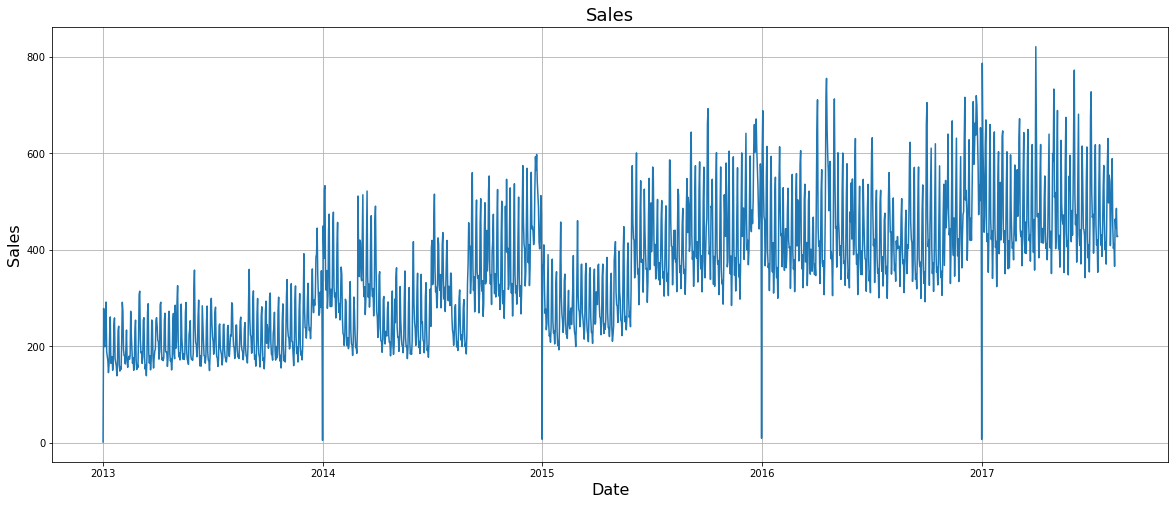

In [590]:
sales_mean = (train_detail['sales'].groupby(train_detail['date']).mean()) #Utilizando média pois, se utilizasse a soma das vendas totais poderia correr o risco de má interpretação dos dados
                                                                                               #  em função da inauguração ou fechamento de lojas.

plt.figure(figsize=(20,8))
sns.lineplot(sales_mean.index, sales_mean.values)

plt.grid()
plt.title('Sales', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [591]:
train_detail['date'] = train_detail.date.dt.to_period('D')
train_detail = train_detail.set_index(['date']).sort_index()


In [592]:
test_detail['date'] = test_detail.date.dt.to_period('D')
test_detail = test_detail.set_index(['date']).sort_index()

In [593]:
train_detail.index.values

array([Period('2013-01-01', 'D'), Period('2013-01-01', 'D'),
       Period('2013-01-01', 'D'), ..., Period('2017-08-15', 'D'),
       Period('2017-08-15', 'D'), Period('2017-08-15', 'D')], dtype=object)

In [594]:
train_detail = train_detail.fillna(0)
test_detail = test_detail.fillna(0)


In [595]:
train_detail

,id,store_nbr,family,sales,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions
date,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0
2013-01-01,1,1,BABY CARE,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0
2013-01-01,2,1,BEAUTY,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0
2013-01-01,3,1,BEVERAGES,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0
2013-01-01,4,1,BOOKS,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,15.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0
2017-08-15,3000884,9,PREPARED FOODS,154.553,8.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0
2017-08-15,3000885,9,PRODUCE,2419.729,148.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0


In [596]:
del train
del train_
del train_d
del train_de
del train_det

del train_deta

del test
del test_
del test_d
del test_de
del test_det

del test_deta

In [597]:
train_detail['year'] = train_detail.index.year

In [598]:
train_detail = train_detail.reset_index('date')

In [599]:
train_detail = train_detail.set_index('date')

In [600]:
train_detail['year'].value_counts()

2016    650430
2013    648648
2014    648648
2015    648648
2017    404514
Name: year, dtype: int64

<AxesSubplot:title={'center':'Sales by year'}, xlabel='year'>

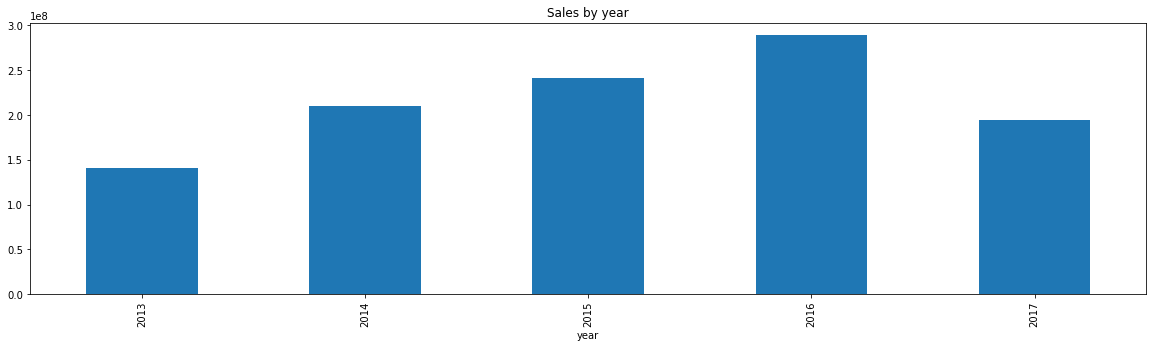

In [601]:
train_detail.groupby('year').sum().sales.plot(kind='bar',figsize=(20, 5), title="Sales by year")

In [602]:
train_detail[train_detail['store_nbr'] == 1].groupby('date')

<AxesSubplot:xlabel='date'>

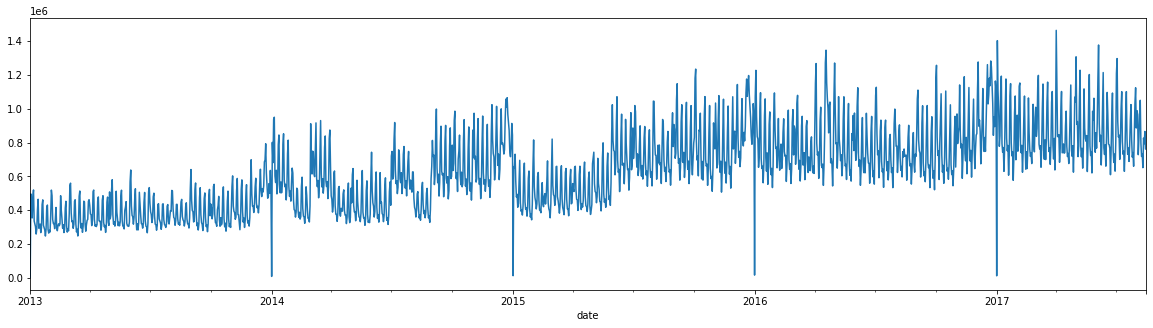

In [603]:
train_detail.groupby(train_detail.index).sum().sales.plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

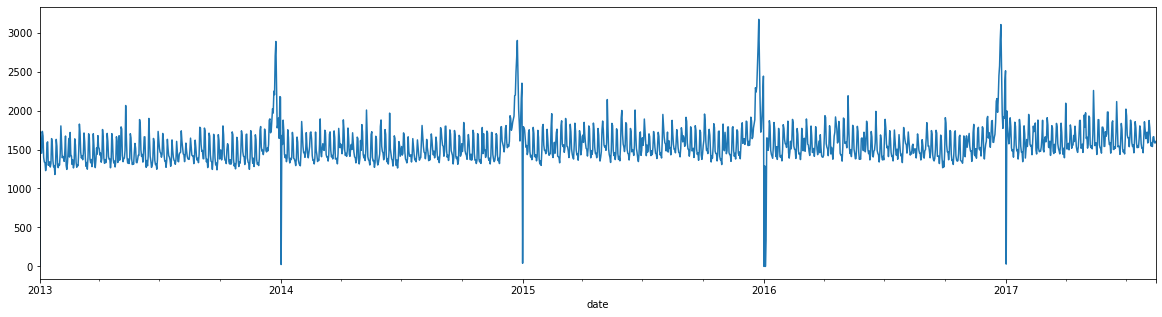

In [604]:
train_detail.groupby(train_detail.index).mean().transactions.plot(figsize=(20,5))

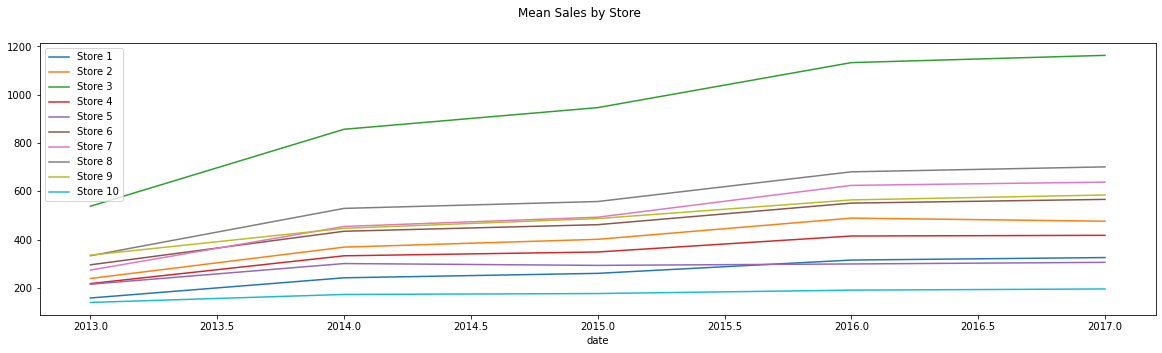

In [605]:
axs = train_detail[train_detail['store_nbr']==1].groupby(train_detail[train_detail['store_nbr']==1].index.year).mean().sales.plot(
    subplots=True, figsize=(20, 5), color= 'C0', markeredgecolor= '0.25', markerfacecolor= '0.25', label='Store 1', alpha=2)
axs = train_detail[train_detail['store_nbr']==2].groupby(train_detail[train_detail['store_nbr']==2].index.year).mean().sales.plot(subplots=True, color='C1', ax=axs, label='Store 2')
axs = train_detail[train_detail['store_nbr']==3].groupby(train_detail[train_detail['store_nbr']==3].index.year).mean().sales.plot(subplots=True, color='C2', ax=axs, label='Store 3')
axs = train_detail[train_detail['store_nbr']==4].groupby(train_detail[train_detail['store_nbr']==4].index.year).mean().sales.plot(subplots=True, color='C3', ax=axs, label='Store 4')
axs = train_detail[train_detail['store_nbr']==5].groupby(train_detail[train_detail['store_nbr']==5].index.year).mean().sales.plot(subplots=True, color='C4', ax=axs, label='Store 5')
axs = train_detail[train_detail['store_nbr']==6].groupby(train_detail[train_detail['store_nbr']==6].index.year).mean().sales.plot(subplots=True, color='C5', ax=axs, label='Store 6')
axs = train_detail[train_detail['store_nbr']==7].groupby(train_detail[train_detail['store_nbr']==7].index.year).mean().sales.plot(subplots=True, color='C6', ax=axs, label='Store 7')
axs = train_detail[train_detail['store_nbr']==8].groupby(train_detail[train_detail['store_nbr']==8].index.year).mean().sales.plot(subplots=True, color='C7', ax=axs, label='Store 8')
axs = train_detail[train_detail['store_nbr']==9].groupby(train_detail[train_detail['store_nbr']==9].index.year).mean().sales.plot(subplots=True, color='C8', ax=axs, label='Store 9')
axs = train_detail[train_detail['store_nbr']==10].groupby(train_detail[train_detail['store_nbr']==10].index.year).mean().sales.plot(subplots=True, color='C9', ax=axs, label='Store 10')
plt.suptitle('Mean Sales by Store')
plt.legend()

<AxesSubplot:xlabel='date'>

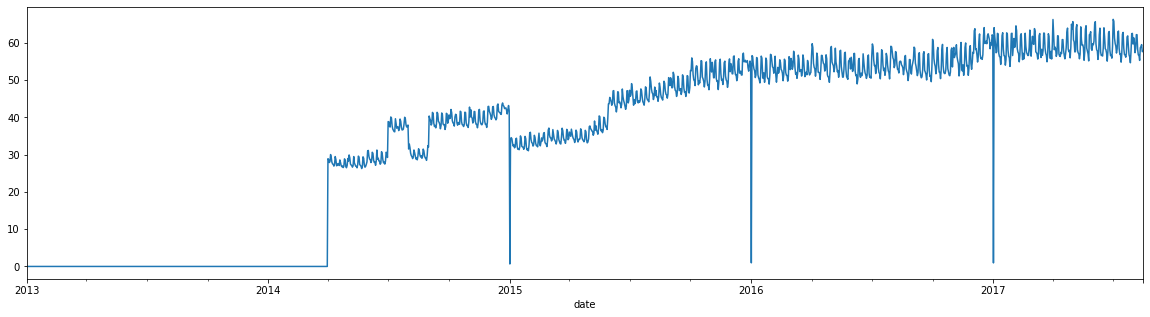

In [606]:
train_detail['onpromotion'].groupby(train_detail.index).mean().plot(figsize=(20,5))

<AxesSubplot:xlabel='date'>

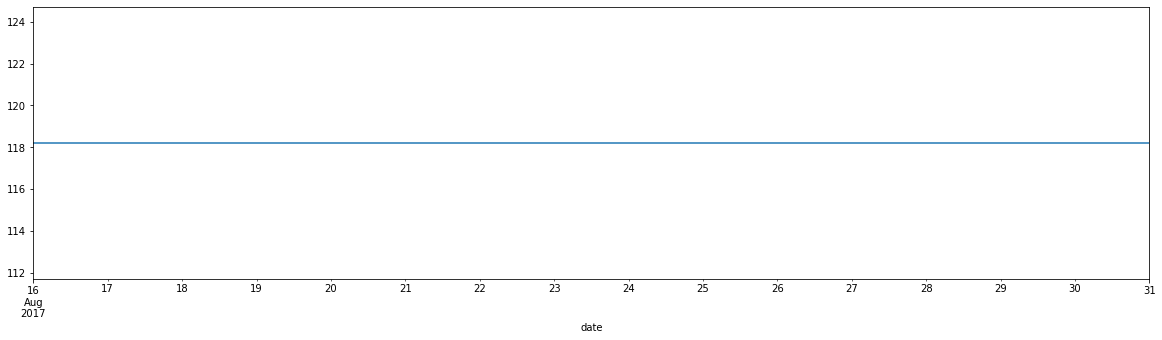

In [607]:
test_detail['onpromotion'].groupby(test_detail.index).mean().plot(figsize=(20,5))

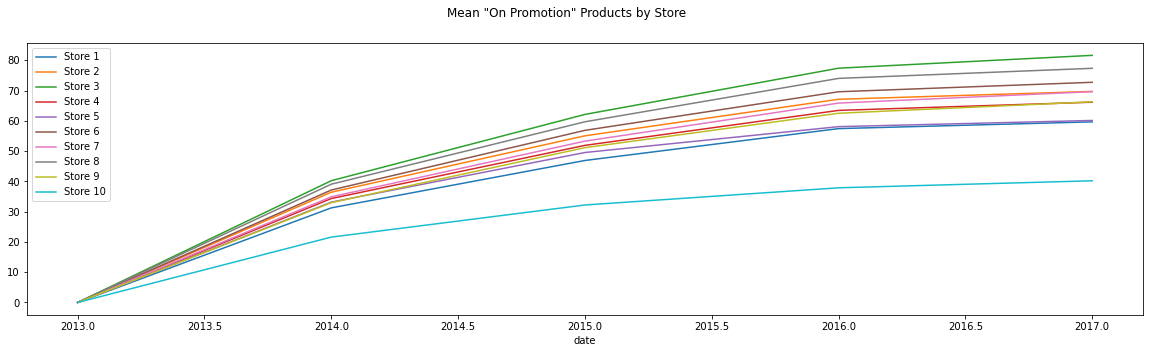

In [608]:
axs = train_detail[train_detail['store_nbr']==1].groupby(train_detail[train_detail['store_nbr']==1].index.year).mean().onpromotion.plot(
    subplots=True, figsize=(20, 5), color= 'C0', markeredgecolor= '0.25', markerfacecolor= '0.25', label='Store 1', alpha=2)
axs = train_detail[train_detail['store_nbr']==2].groupby(train_detail[train_detail['store_nbr']==2].index.year).mean().onpromotion.plot(subplots=True, color='C1', ax=axs, label='Store 2')
axs = train_detail[train_detail['store_nbr']==3].groupby(train_detail[train_detail['store_nbr']==3].index.year).mean().onpromotion.plot(subplots=True, color='C2', ax=axs, label='Store 3')
axs = train_detail[train_detail['store_nbr']==4].groupby(train_detail[train_detail['store_nbr']==4].index.year).mean().onpromotion.plot(subplots=True, color='C3', ax=axs, label='Store 4')
axs = train_detail[train_detail['store_nbr']==5].groupby(train_detail[train_detail['store_nbr']==5].index.year).mean().onpromotion.plot(subplots=True, color='C4', ax=axs, label='Store 5')
axs = train_detail[train_detail['store_nbr']==6].groupby(train_detail[train_detail['store_nbr']==6].index.year).mean().onpromotion.plot(subplots=True, color='C5', ax=axs, label='Store 6')
axs = train_detail[train_detail['store_nbr']==7].groupby(train_detail[train_detail['store_nbr']==7].index.year).mean().onpromotion.plot(subplots=True, color='C6', ax=axs, label='Store 7')
axs = train_detail[train_detail['store_nbr']==8].groupby(train_detail[train_detail['store_nbr']==8].index.year).mean().onpromotion.plot(subplots=True, color='C7', ax=axs, label='Store 8')
axs = train_detail[train_detail['store_nbr']==9].groupby(train_detail[train_detail['store_nbr']==9].index.year).mean().onpromotion.plot(subplots=True, color='C8', ax=axs, label='Store 9')
axs = train_detail[train_detail['store_nbr']==10].groupby(train_detail[train_detail['store_nbr']==10].index.year).mean().onpromotion.plot(subplots=True, color='C9', ax=axs, label='Store 10')
plt.suptitle('Mean "On Promotion" Products by Store')
plt.legend()

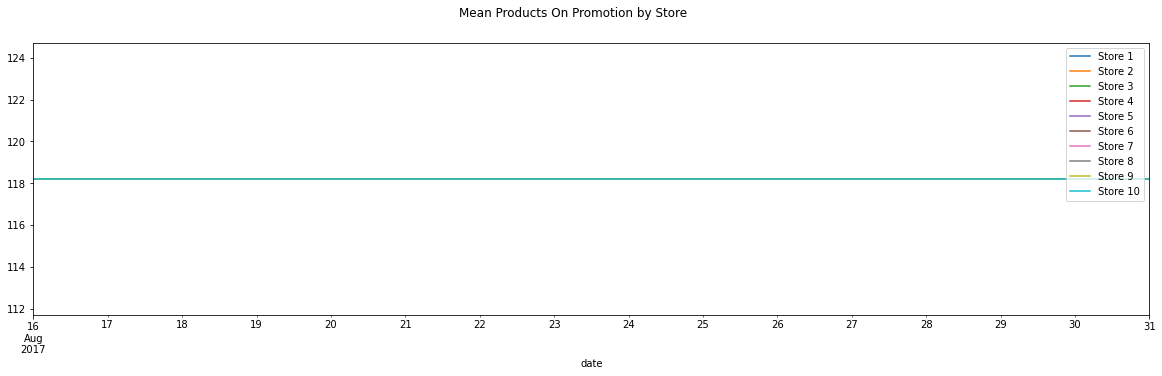

In [609]:
axs = test_detail[test_detail['store_nbr']==1].groupby(test_detail[test_detail['store_nbr']==1].index).mean().onpromotion.plot(
    subplots=True, figsize=(20, 5), color= 'C0', markeredgecolor= '0.25', markerfacecolor= '0.25', label='Store 1', alpha=2)
axs = test_detail[test_detail['store_nbr']==2].groupby(test_detail[test_detail['store_nbr']==2].index).mean().onpromotion.plot(subplots=True, color='C1', ax=axs, label='Store 2')
axs = test_detail[test_detail['store_nbr']==3].groupby(test_detail[test_detail['store_nbr']==3].index).mean().onpromotion.plot(subplots=True, color='C2', ax=axs, label='Store 3')
axs = test_detail[test_detail['store_nbr']==4].groupby(test_detail[test_detail['store_nbr']==4].index).mean().onpromotion.plot(subplots=True, color='C3', ax=axs, label='Store 4')
axs = test_detail[test_detail['store_nbr']==5].groupby(test_detail[test_detail['store_nbr']==5].index).mean().onpromotion.plot(subplots=True, color='C4', ax=axs, label='Store 5')
axs = test_detail[test_detail['store_nbr']==6].groupby(test_detail[test_detail['store_nbr']==6].index).mean().onpromotion.plot(subplots=True, color='C5', ax=axs, label='Store 6')
axs = test_detail[test_detail['store_nbr']==7].groupby(test_detail[test_detail['store_nbr']==7].index).mean().onpromotion.plot(subplots=True, color='C6', ax=axs, label='Store 7')
axs = test_detail[test_detail['store_nbr']==8].groupby(test_detail[test_detail['store_nbr']==8].index).mean().onpromotion.plot(subplots=True, color='C7', ax=axs, label='Store 8')
axs = test_detail[test_detail['store_nbr']==9].groupby(test_detail[test_detail['store_nbr']==9].index).mean().onpromotion.plot(subplots=True, color='C8', ax=axs, label='Store 9')
axs = test_detail[test_detail['store_nbr']==10].groupby(test_detail[test_detail['store_nbr']==10].index).mean().onpromotion.plot(subplots=True, color='C9', ax=axs, label='Store 10')
plt.suptitle('Mean Products On Promotion by Store')
plt.legend()

In [610]:
family_sales = pd.DataFrame(train_detail.copy())


In [611]:
le = LabelEncoder()


In [612]:
family_sales['family'] = le.fit_transform(family_sales['family']) 

In [613]:
family_sales['data'] = family_sales.index.day

In [614]:
family_sales = family_sales.reset_index(['date'])


In [615]:
family_sales

,date,id,store_nbr,family,sales,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data
0,2013-01-01,0,1,0,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0,2013,1
1,2013-01-01,1,1,1,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0,2013,1
2,2013-01-01,2,1,2,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0,2013,1
3,2013-01-01,3,1,3,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0,2013,1
4,2013-01-01,4,1,4,0.000,0.0,0.0,1.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,0.0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,3000883,9,28,438.133,15.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
3000884,2017-08-15,3000884,9,29,154.553,8.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
3000885,2017-08-15,3000885,9,30,2419.729,148.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
3000886,2017-08-15,3000886,9,31,121.000,10.0,0.0,0.0,Quito,Pichincha,B,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15


In [616]:
family_sales = family_sales.set_index(['date', 'id', 'store_nbr', 'family'])


In [617]:
# Target series
y = pd.DataFrame(family_sales['sales'])

In [618]:
y['sales'] = np.log(1+y['sales'])

In [619]:
# X_2: Features for XGBoost
X = family_sales.drop('sales', axis=1) 

In [620]:
X['state'] = le.fit_transform(X['state'])
X['city'] = le.fit_transform(X['city'])
X['type'] = le.fit_transform(X['type'])

In [621]:
X = X.reset_index(['store_nbr', 'family'])

In [660]:
y_train, y_valid = y[:"2017-07-01"], y["2017-07-02":]
X_train, X_valid = X[:"2017-07-01"], X["2017-07-02":]


In [623]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))


In [624]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
Y_pred_lin = linreg.predict(X_valid)
rmse(y_valid,Y_pred_lin)


1.9326444838883161

In [625]:
r2_score(y_valid, Y_pred_lin)

0.41851513633396675

In [626]:
#XGBOOST
xb_reg = XGBRegressor(n_estimators=500, learning_rate=0.5)
xb_reg.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train)],verbose=False)
Y_pred_xb = xb_reg.predict(X_valid)


In [627]:
rmse(y_valid,Y_pred_xb)

0.28055087122091144

In [628]:
r2_score(y_valid, Y_pred_xb)

0.9877465688564352

In [629]:
y_valid

sales
date       id      store_nbr family          
2017-07-02 2920698 1         0       1.609438
           2920699 1         1       0.000000
           2920700 1         2       1.098612
           2920701 1         3       7.035269
           2920702 1         4       0.000000
...                                       ...
2017-08-15 3000883 9         28      6.084802
           3000884 9         29      5.046987
           3000885 9         30      7.791824
           3000886 9         31      4.804021
           3000887 9         32      2.833213

[80190 rows x 1 columns]

In [630]:
X_valid = X_valid.reset_index(['date', 'id'])

In [631]:
X_valid

,date,id,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data
0,2017-07-02,2920698,1,0,4.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
1,2017-07-02,2920699,1,1,0.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
2,2017-07-02,2920700,1,2,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
3,2017-07-02,2920701,1,3,244.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
4,2017-07-02,2920702,1,4,0.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80185,2017-08-15,3000883,9,28,15.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
80186,2017-08-15,3000884,9,29,8.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
80187,2017-08-15,3000885,9,30,148.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
80188,2017-08-15,3000886,9,31,10.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15


In [632]:
y

sales
date       id      store_nbr family          
2013-01-01 0       1         0       0.000000
           1       1         1       0.000000
           2       1         2       0.000000
           3       1         3       0.000000
           4       1         4       0.000000
...                                       ...
2017-08-15 3000883 9         28      6.084802
           3000884 9         29      5.046987
           3000885 9         30      7.791824
           3000886 9         31      4.804021
           3000887 9         32      2.833213

[3000888 rows x 1 columns]

In [633]:
y_pred = pd.DataFrame(Y_pred_xb)

In [634]:
y_pred = np.exp(y_pred[0]) - 1

In [635]:
y_pred

0           4.667031
1          -0.011076
2           1.462567
3        1125.086426
4          -0.054033
            ...     
80185     333.729126
80186      78.096939
80187    2084.335205
80188      54.279655
80189      11.106323
Name: 0, Length: 80190, dtype: float32

In [636]:
y_pred = pd.DataFrame(y_pred)

In [637]:
y_pred['id'] = np.arange(2920698,3000888)

In [638]:
y_pred = y_pred.rename(columns={0: "Sales_Pred"})

In [639]:
X_valid

,date,id,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data
0,2017-07-02,2920698,1,0,4.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
1,2017-07-02,2920699,1,1,0.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
2,2017-07-02,2920700,1,2,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
3,2017-07-02,2920701,1,3,244.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
4,2017-07-02,2920702,1,4,0.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80185,2017-08-15,3000883,9,28,15.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
80186,2017-08-15,3000884,9,29,8.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
80187,2017-08-15,3000885,9,30,148.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15
80188,2017-08-15,3000886,9,31,10.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15


In [640]:
X_pred = X_valid.merge(y_pred, how='left', on=['id']).sort_values(by='id')

In [641]:
X_pred = X_pred.set_index(['date'])

In [642]:
X_pred

,id,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data,Sales_Pred
date,,,,,,,,,,,,,,,,,,,
2017-07-02,2920698,1,0,4.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2,4.667031
2017-07-02,2920699,1,1,0.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2,-0.011076
2017-07-02,2920700,1,2,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2,1.462567
2017-07-02,2920701,1,3,244.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2,1125.086426
2017-07-02,2920702,1,4,0.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,542.0,2017,2,-0.054033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,28,15.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15,333.729126
2017-08-15,3000884,9,29,8.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15,78.096939
2017-08-15,3000885,9,30,148.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.57,2155.0,2017,15,2084.335205


In [643]:
X_price = family_sales["2017-01-01":"2017-07-01"]

In [644]:
X_price = X_price.reset_index(['store_nbr', 'family', 'id'])

In [645]:
def graphic(family):
    axs = X_price[X_price['store_nbr'] == 1][X_price[X_price['store_nbr'] == 1]['family'] == family]['sales'].plot(
        subplots=True, sharex=True, figsize=(20, 5), color= 'C0', markeredgecolor= '0.25', markerfacecolor= '0.25', legend= False, alpha=0.5)
    axs = X_pred[X_pred['store_nbr'] == 1][X_pred[X_pred['store_nbr'] == 1]['family'] == family]['Sales_Pred'].plot(subplots=True, sharex=True, color='C3', ax=axs)
    for ax in axs: ax.legend([])
    _ = plt.suptitle(train_detail['family'].iloc[family])


When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


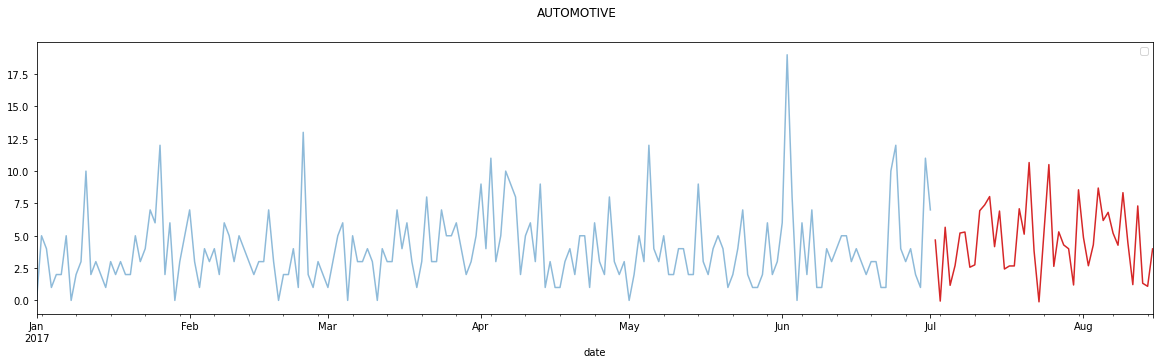

In [646]:
graphic(0)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


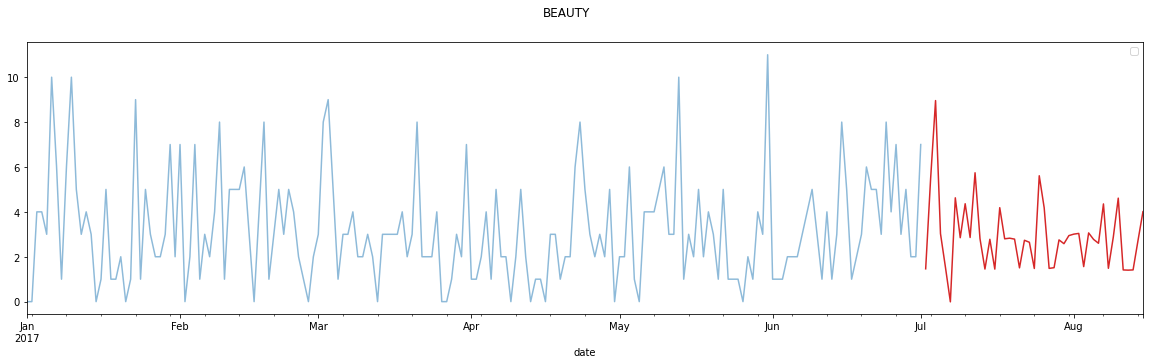

In [647]:
graphic(2)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


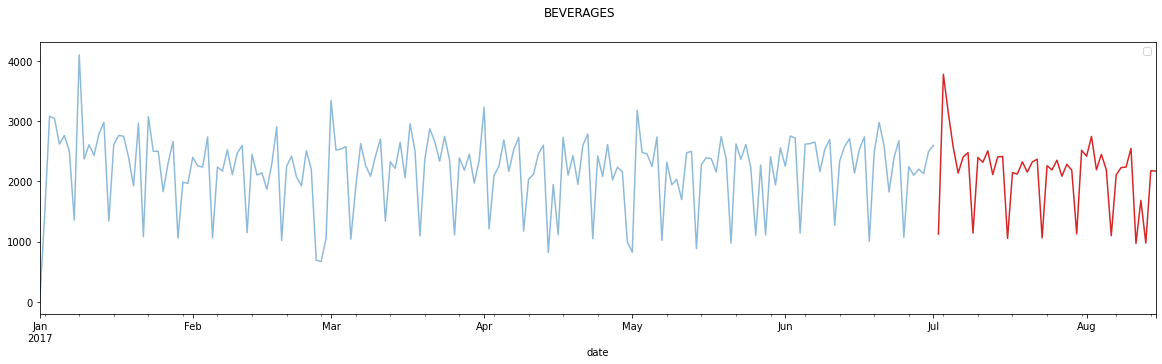

In [648]:
graphic(3)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


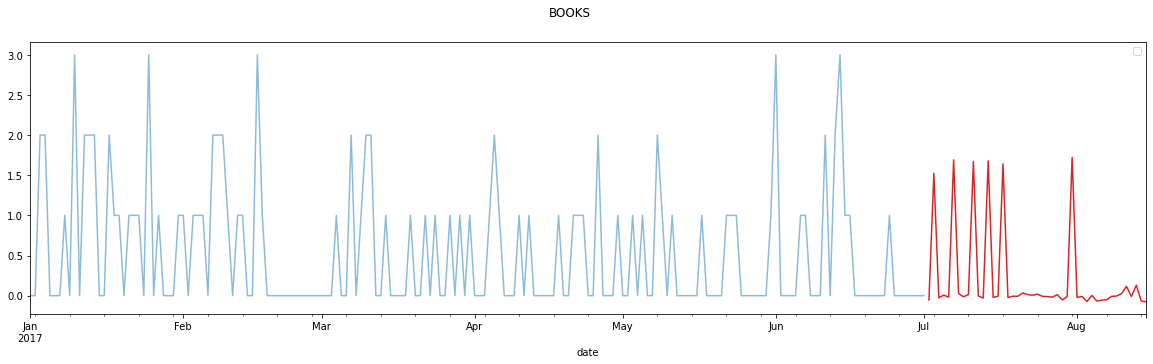

In [649]:
graphic(4)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


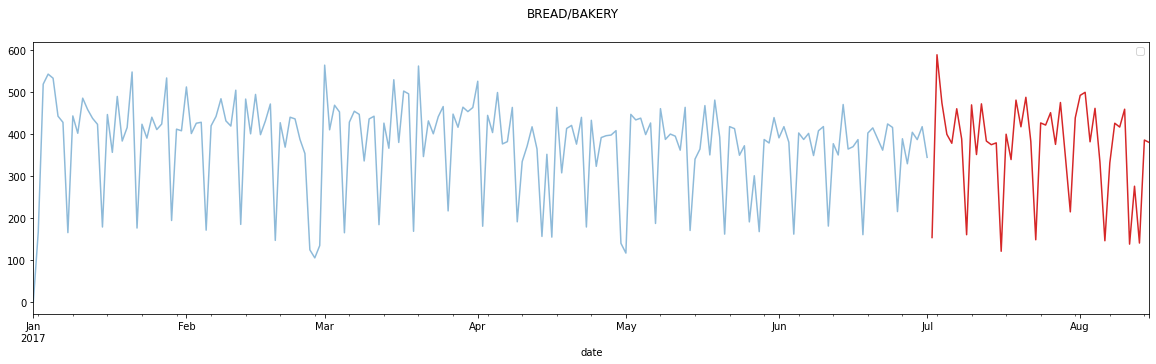

In [650]:
graphic(5)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


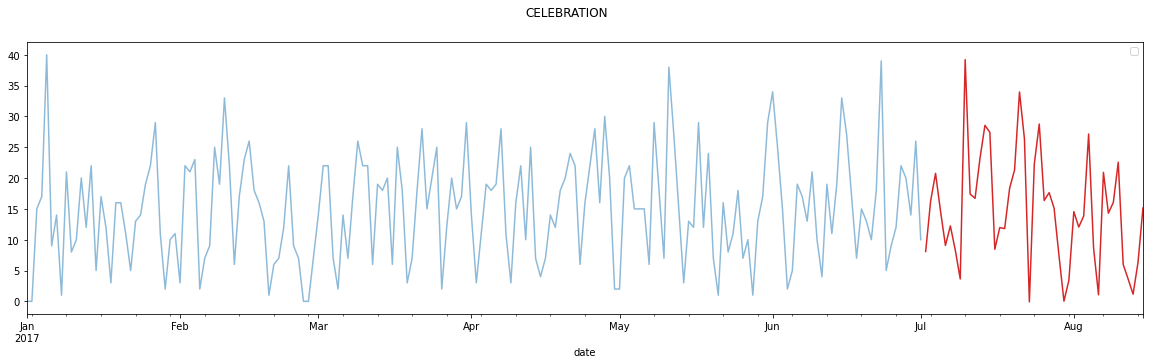

In [651]:
graphic(6)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


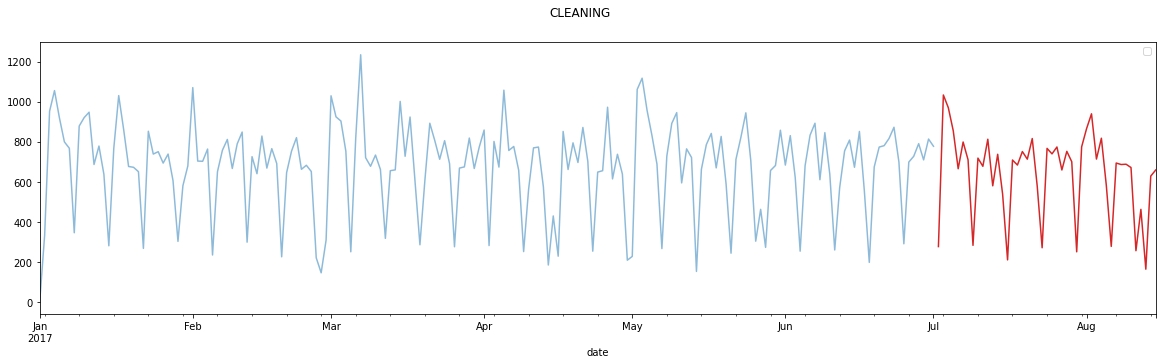

In [652]:
graphic(7)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


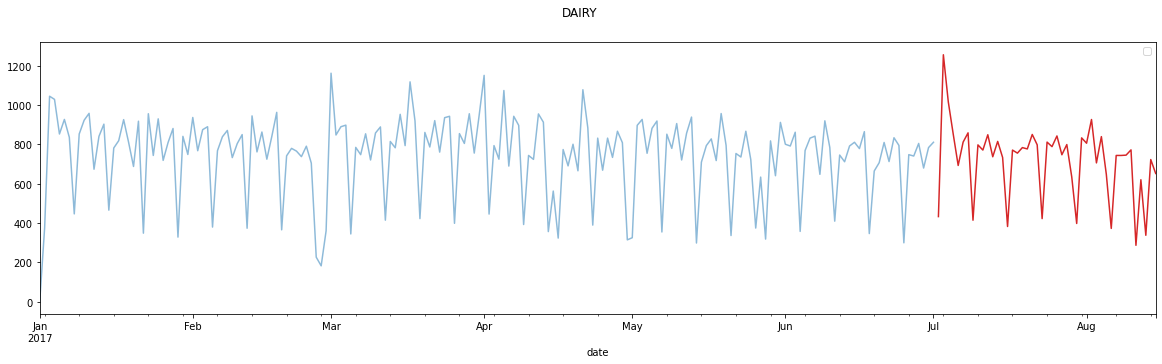

In [653]:
graphic(8)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


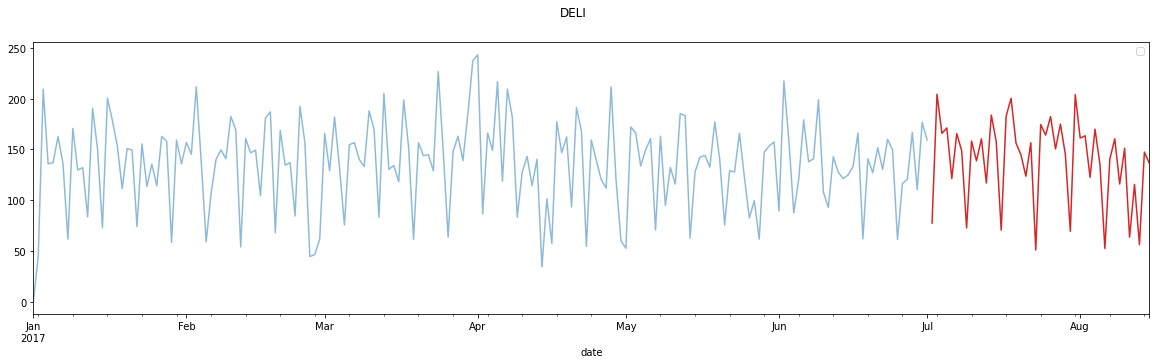

In [654]:
graphic(9)

In [655]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80190 entries, 0 to 80189
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   date                  80190 non-null  period[D]
 1   id                    80190 non-null  int64    
 2   store_nbr             80190 non-null  int64    
 3   family                80190 non-null  int64    
 4   onpromotion           80190 non-null  float64  
 5   transferred           80190 non-null  float64  
 6   holidays              80190 non-null  float64  
 7   city                  80190 non-null  int32    
 8   state                 80190 non-null  int32    
 9   type                  80190 non-null  int32    
 10  cluster               80190 non-null  int64    
 11  city_transf           80190 non-null  float64  
 12  city_holidays         80190 non-null  float64  
 13  state_holiday_transf  80190 non-null  int64    
 14  state_holidays        80190 non-null  

In [661]:
X_valid

store_nbr  family  onpromotion  transferred  holidays  \
date       id                                                               
2017-07-02 2920698          1       0          4.0          0.0       0.0   
           2920699          1       1          0.0          0.0       0.0   
           2920700          1       2          1.0          0.0       0.0   
           2920701          1       3        244.0          0.0       0.0   
           2920702          1       4          0.0          0.0       0.0   
...                       ...     ...          ...          ...       ...   
2017-08-15 3000883          9      28         15.0          0.0       0.0   
           3000884          9      29          8.0          0.0       0.0   
           3000885          9      30        148.0          0.0       0.0   
           3000886          9      31         10.0          0.0       0.0   
           3000887          9      32          2.0          0.0       0.0   

                    city  state  type  cluster  city_transf  city_holidays  \
date       id                                                                
2017-07-02 2920698    18     12     3       13          0.0            0.0   
           2920699    18     12     3       13          0.0            0.0   
           2920700    18     12     3       13          0.0            0.0   
           2920701    18     12     3       13          0.0            0.0   
           2920702    18     12     3       13          0.0            0.0   
...                  ...    ...   ...      ...          ...            ...   
2017-08-15 3000883    18     12     1        6          0.0            0.0   
           3000884    18     12     1        6          0.0            0.0   
           3000885    18     12     1        6          0.0            0.0   
           3000886    18     12     1        6          0.0            0.0   
           3000887    18     12     1        6          0.0            0.0   

                    state_holiday_transf  state_holidays  dcoilwtico  \
date       id                                                          
2017-07-02 2920698                     0             0.0        0.00   
           2920699                     0             0.0        0.00   
           2920700                     0             0.0        0.00   
           2920701                     0             0.0        0.00   
           2920702                     0             0.0        0.00   
...                                  ...             ...         ...   
2017-08-15 3000883                     0             0.0       47.57   
           3000884                     0             0.0       47.57   
           3000885                     0             0.0       47.57   
           3000886                     0             0.0       47.57   
           3000887                     0             0.0       47.57   

                    transactions  year  data  
date       id                                 
2017-07-02 2920698         542.0  2017     2  
           2920699         542.0  2017     2  
           2920700         542.0  2017     2  
           2920701         542.0  2017     2  
           2920702         542.0  2017     2  
...                          ...   ...   ...  
2017-08-15 3000883        2155.0  2017    15  
           3000884        2155.0  2017    15  
           3000885        2155.0  2017    15  
           3000886        2155.0  2017    15  
           3000887        2155.0  2017    15  

[80190 rows x 17 columns]

In [662]:
explainer = shap.TreeExplainer(xb_reg)
shap_values = explainer.shap_values(X_valid)


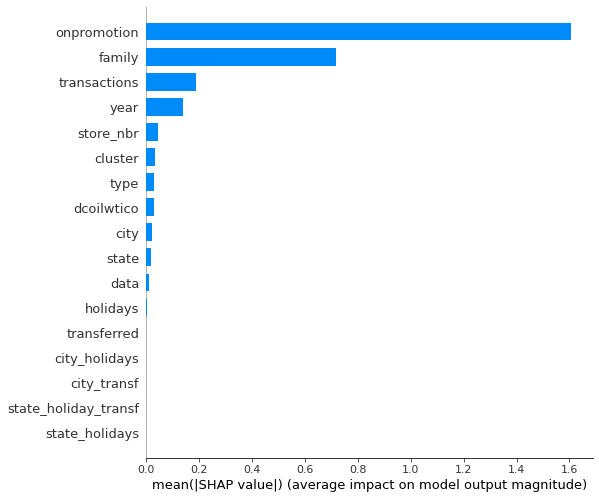

In [663]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

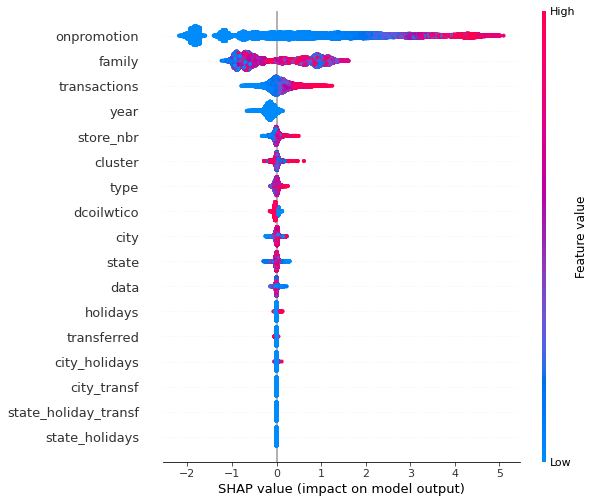

In [664]:
shap.summary_plot(shap_values, X_valid)

In [665]:
X_valid

store_nbr  family  onpromotion  transferred  holidays  \
date       id                                                               
2017-07-02 2920698          1       0          4.0          0.0       0.0   
           2920699          1       1          0.0          0.0       0.0   
           2920700          1       2          1.0          0.0       0.0   
           2920701          1       3        244.0          0.0       0.0   
           2920702          1       4          0.0          0.0       0.0   
...                       ...     ...          ...          ...       ...   
2017-08-15 3000883          9      28         15.0          0.0       0.0   
           3000884          9      29          8.0          0.0       0.0   
           3000885          9      30        148.0          0.0       0.0   
           3000886          9      31         10.0          0.0       0.0   
           3000887          9      32          2.0          0.0       0.0   

                    city  state  type  cluster  city_transf  city_holidays  \
date       id                                                                
2017-07-02 2920698    18     12     3       13          0.0            0.0   
           2920699    18     12     3       13          0.0            0.0   
           2920700    18     12     3       13          0.0            0.0   
           2920701    18     12     3       13          0.0            0.0   
           2920702    18     12     3       13          0.0            0.0   
...                  ...    ...   ...      ...          ...            ...   
2017-08-15 3000883    18     12     1        6          0.0            0.0   
           3000884    18     12     1        6          0.0            0.0   
           3000885    18     12     1        6          0.0            0.0   
           3000886    18     12     1        6          0.0            0.0   
           3000887    18     12     1        6          0.0            0.0   

                    state_holiday_transf  state_holidays  dcoilwtico  \
date       id                                                          
2017-07-02 2920698                     0             0.0        0.00   
           2920699                     0             0.0        0.00   
           2920700                     0             0.0        0.00   
           2920701                     0             0.0        0.00   
           2920702                     0             0.0        0.00   
...                                  ...             ...         ...   
2017-08-15 3000883                     0             0.0       47.57   
           3000884                     0             0.0       47.57   
           3000885                     0             0.0       47.57   
           3000886                     0             0.0       47.57   
           3000887                     0             0.0       47.57   

                    transactions  year  data  
date       id                                 
2017-07-02 2920698         542.0  2017     2  
           2920699         542.0  2017     2  
           2920700         542.0  2017     2  
           2920701         542.0  2017     2  
           2920702         542.0  2017     2  
...                          ...   ...   ...  
2017-08-15 3000883        2155.0  2017    15  
           3000884        2155.0  2017    15  
           3000885        2155.0  2017    15  
           3000886        2155.0  2017    15  
           3000887        2155.0  2017    15  

[80190 rows x 17 columns]

In [703]:
X_c = pd.DataFrame(test_detail)

In [709]:
X_c = X_c.drop(columns=['data', 'year'])

In [710]:
X_c['state'] = le.fit_transform(X_c['state'])
X_c['city'] = le.fit_transform(X_c['city'])
X_c['type'] = le.fit_transform(X_c['type'])
X_c['family'] = le.fit_transform(X_c['family'])

In [711]:
X_c['year'] = X_c.index.year
X_c['data'] = X_c.index.day


In [712]:
X_c = X_c.reset_index('date')

In [713]:
X_c = X_c.set_index(['date', 'id'])

In [714]:
'''X_c['year'] = X_c.index.year'''

"X_c['year'] = X_c.index.year"

In [715]:
X_c

store_nbr  family  onpromotion  transferred  holidays  \
date       id                                                               
2017-08-16 3000888          1       0         20.0          0.0       0.0   
           3000889          1       1          1.0          0.0       0.0   
           3000890          1       2          8.0          0.0       0.0   
           3000891          1       3        560.0          0.0       0.0   
           3000892          1       4          1.0          0.0       0.0   
...                       ...     ...          ...          ...       ...   
2017-08-31 3029395          9      28         54.0          0.0       0.0   
           3029396          9      29         10.0          0.0       0.0   
           3029397          9      30        302.0          0.0       0.0   
           3029398          9      31         15.0          0.0       0.0   
           3029399          9      32          8.0          0.0       0.0   

                    city  state  type  cluster  city_transf  city_holidays  \
date       id                                                                
2017-08-16 3000888    18     12     3       13          0.0            0.0   
           3000889    18     12     3       13          0.0            0.0   
           3000890    18     12     3       13          0.0            0.0   
           3000891    18     12     3       13          0.0            0.0   
           3000892    18     12     3       13          0.0            0.0   
...                  ...    ...   ...      ...          ...            ...   
2017-08-31 3029395    18     12     1        6          0.0            0.0   
           3029396    18     12     1        6          0.0            0.0   
           3029397    18     12     1        6          0.0            0.0   
           3029398    18     12     1        6          0.0            0.0   
           3029399    18     12     1        6          0.0            0.0   

                    state_holiday_transf  state_holidays  dcoilwtico  \
date       id                                                          
2017-08-16 3000888                     0             0.0       46.80   
           3000889                     0             0.0       46.80   
           3000890                     0             0.0       46.80   
           3000891                     0             0.0       46.80   
           3000892                     0             0.0       46.80   
...                                  ...             ...         ...   
2017-08-31 3029395                     0             0.0       47.26   
           3029396                     0             0.0       47.26   
           3029397                     0             0.0       47.26   
           3029398                     0             0.0       47.26   
           3029399                     0             0.0       47.26   

                    transactions  year  data  
date       id                                 
2017-08-16 3000888           0.0  2017    16  
           3000889           0.0  2017    16  
           3000890           0.0  2017    16  
           3000891           0.0  2017    16  
           3000892           0.0  2017    16  
...                          ...   ...   ...  
2017-08-31 3029395           0.0  2017    31  
           3029396           0.0  2017    31  
           3029397           0.0  2017    31  
           3029398           0.0  2017    31  
           3029399           0.0  2017    31  

[28512 rows x 17 columns]

In [716]:
X_valid

store_nbr  family  onpromotion  transferred  holidays  \
date       id                                                               
2017-07-02 2920698          1       0          4.0          0.0       0.0   
           2920699          1       1          0.0          0.0       0.0   
           2920700          1       2          1.0          0.0       0.0   
           2920701          1       3        244.0          0.0       0.0   
           2920702          1       4          0.0          0.0       0.0   
...                       ...     ...          ...          ...       ...   
2017-08-15 3000883          9      28         15.0          0.0       0.0   
           3000884          9      29          8.0          0.0       0.0   
           3000885          9      30        148.0          0.0       0.0   
           3000886          9      31         10.0          0.0       0.0   
           3000887          9      32          2.0          0.0       0.0   

                    city  state  type  cluster  city_transf  city_holidays  \
date       id                                                                
2017-07-02 2920698    18     12     3       13          0.0            0.0   
           2920699    18     12     3       13          0.0            0.0   
           2920700    18     12     3       13          0.0            0.0   
           2920701    18     12     3       13          0.0            0.0   
           2920702    18     12     3       13          0.0            0.0   
...                  ...    ...   ...      ...          ...            ...   
2017-08-15 3000883    18     12     1        6          0.0            0.0   
           3000884    18     12     1        6          0.0            0.0   
           3000885    18     12     1        6          0.0            0.0   
           3000886    18     12     1        6          0.0            0.0   
           3000887    18     12     1        6          0.0            0.0   

                    state_holiday_transf  state_holidays  dcoilwtico  \
date       id                                                          
2017-07-02 2920698                     0             0.0        0.00   
           2920699                     0             0.0        0.00   
           2920700                     0             0.0        0.00   
           2920701                     0             0.0        0.00   
           2920702                     0             0.0        0.00   
...                                  ...             ...         ...   
2017-08-15 3000883                     0             0.0       47.57   
           3000884                     0             0.0       47.57   
           3000885                     0             0.0       47.57   
           3000886                     0             0.0       47.57   
           3000887                     0             0.0       47.57   

                    transactions  year  data  
date       id                                 
2017-07-02 2920698         542.0  2017     2  
           2920699         542.0  2017     2  
           2920700         542.0  2017     2  
           2920701         542.0  2017     2  
           2920702         542.0  2017     2  
...                          ...   ...   ...  
2017-08-15 3000883        2155.0  2017    15  
           3000884        2155.0  2017    15  
           3000885        2155.0  2017    15  
           3000886        2155.0  2017    15  
           3000887        2155.0  2017    15  

[80190 rows x 17 columns]

In [717]:
Y_future= xb_reg.predict(X_c)

In [718]:
Y_future = pd.DataFrame(Y_future)

In [719]:
Y_future = np.exp(Y_future[0]) - 1

In [720]:
Y_future = pd.DataFrame(Y_future)

In [721]:
Y_future

,0
0,28.184450
1,2.074522
2,8.069760
3,2454.848633
4,2.164176
...,...
28507,648.358276
28508,70.964859
28509,6258.822754
28510,128.671707


In [722]:
Y_future['id'] = np.arange(3000888,3029400)

In [723]:
Y_future = Y_future.rename(columns={0: "Sales_Pred"})

In [724]:
X_c = X_c.reset_index(['date', 'id'])

In [725]:
X_future = X_c.merge(Y_future, how='left', on=['id'])

In [726]:
X_future

,date,id,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data,Sales_Pred
0,2017-08-16,3000888,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,28.184450
1,2017-08-16,3000889,1,1,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,2.074522
2,2017-08-16,3000890,1,2,8.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,8.069760
3,2017-08-16,3000891,1,3,560.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,2454.848633
4,2017-08-16,3000892,1,4,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,2.164176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,3029395,9,28,54.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,648.358276
28508,2017-08-31,3029396,9,29,10.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,70.964859
28509,2017-08-31,3029397,9,30,302.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,6258.822754
28510,2017-08-31,3029398,9,31,15.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,128.671707


In [727]:
X_future = X_future.set_index('date')

In [728]:
X_f = family_sales["2017-01-01":"2017-08-15"].copy()

In [729]:
X_f

sales  onpromotion  transferred  \
date       id      store_nbr family                                       
2017-01-01 2596374 1         0          0.000          0.0          1.0   
           2596375 1         1          0.000          0.0          1.0   
           2596376 1         2          0.000          0.0          1.0   
           2596377 1         3          0.000          0.0          1.0   
           2596378 1         4          0.000          0.0          1.0   
...                                       ...          ...          ...   
2017-08-15 3000883 9         28       438.133         15.0          0.0   
           3000884 9         29       154.553          8.0          0.0   
           3000885 9         30      2419.729        148.0          0.0   
           3000886 9         31       121.000         10.0          0.0   
           3000887 9         32        16.000          2.0          0.0   

                                     holidays   city      state type  cluster  \
date       id      store_nbr family                                             
2017-01-01 2596374 1         0            1.0  Quito  Pichincha    D       13   
           2596375 1         1            1.0  Quito  Pichincha    D       13   
           2596376 1         2            1.0  Quito  Pichincha    D       13   
           2596377 1         3            1.0  Quito  Pichincha    D       13   
           2596378 1         4            1.0  Quito  Pichincha    D       13   
...                                       ...    ...        ...  ...      ...   
2017-08-15 3000883 9         28           0.0  Quito  Pichincha    B        6   
           3000884 9         29           0.0  Quito  Pichincha    B        6   
           3000885 9         30           0.0  Quito  Pichincha    B        6   
           3000886 9         31           0.0  Quito  Pichincha    B        6   
           3000887 9         32           0.0  Quito  Pichincha    B        6   

                                     city_transf  city_holidays  \
date       id      store_nbr family                               
2017-01-01 2596374 1         0               0.0            0.0   
           2596375 1         1               0.0            0.0   
           2596376 1         2               0.0            0.0   
           2596377 1         3               0.0            0.0   
           2596378 1         4               0.0            0.0   
...                                          ...            ...   
2017-08-15 3000883 9         28              0.0            0.0   
           3000884 9         29              0.0            0.0   
           3000885 9         30              0.0            0.0   
           3000886 9         31              0.0            0.0   
           3000887 9         32              0.0            0.0   

                                     state_holiday_transf  state_holidays  \
date       id      store_nbr family                                         
2017-01-01 2596374 1         0                          0             0.0   
           2596375 1         1                          0             0.0   
           2596376 1         2                          0             0.0   
           2596377 1         3                          0             0.0   
           2596378 1         4                          0             0.0   
...                                                   ...             ...   
2017-08-15 3000883 9         28                         0             0.0   
           3000884 9         29                         0             0.0   
           3000885 9         30                         0             0.0   
           3000886 9         31                         0             0.0   
           3000887 9         32                         0             0.0   

                                     dcoilwtico  transactions  year  data  
date       id      store_nbr family                         

In [730]:
X_f['state'] = le.fit_transform(X_f['state'])
X_f['city'] = le.fit_transform(X_f['city'])
X_f['type'] = le.fit_transform(X_f['type'])

In [731]:
X_f = X_f.reset_index(['store_nbr', 'family', 'id'])

In [732]:
beforeprom

store_nbr  family     sales  onpromotion  transferred  \
date       id                                                               
2017-08-01 2974158          1       0     5.000          4.0          0.0   
           2974159          1       1     0.000          0.0          0.0   
           2974160          1       2     4.000          2.0          0.0   
           2974161          1       3  2627.000        317.0          0.0   
           2974162          1       4     0.000          0.0          0.0   
...                       ...     ...       ...          ...          ...   
2017-08-15 3000883          9      28   438.133         15.0          0.0   
           3000884          9      29   154.553          8.0          0.0   
           3000885          9      30  2419.729        148.0          0.0   
           3000886          9      31   121.000         10.0          0.0   
           3000887          9      32    16.000          2.0          0.0   

                    holidays   city      state type  cluster  city_transf  \
date       id                                                               
2017-08-01 2974158       0.0  Quito  Pichincha    D       13          0.0   
           2974159       0.0  Quito  Pichincha    D       13          0.0   
           2974160       0.0  Quito  Pichincha    D       13          0.0   
           2974161       0.0  Quito  Pichincha    D       13          0.0   
           2974162       0.0  Quito  Pichincha    D       13          0.0   
...                      ...    ...        ...  ...      ...          ...   
2017-08-15 3000883       0.0  Quito  Pichincha    B        6          0.0   
           3000884       0.0  Quito  Pichincha    B        6          0.0   
           3000885       0.0  Quito  Pichincha    B        6          0.0   
           3000886       0.0  Quito  Pichincha    B        6          0.0   
           3000887       0.0  Quito  Pichincha    B        6          0.0   

                    city_holidays  state_holiday_transf  state_holidays  \
date       id                                                             
2017-08-01 2974158            0.0                     0             0.0   
           2974159            0.0                     0             0.0   
           2974160            0.0                     0             0.0   
           2974161            0.0                     0             0.0   
           2974162            0.0                     0             0.0   
...                           ...                   ...             ...   
2017-08-15 3000883            0.0                     0             0.0   
           3000884            0.0                     0             0.0   
           3000885            0.0                     0             0.0   
           3000886            0.0                     0             0.0   
           3000887            0.0                     0             0.0   

                    dcoilwtico  transactions  data  
date       id                                       
2017-08-01 2974158       49.19        1795.0     1  
           2974159       49.19        1795.0     1  
           2974160       49.19        1795.0     1  
           2974161       49.19        1795.0     1  
           2974162       49.19        1795.0     1  
...                        ...           ...   ...  
2017-08-15 3000883       47.57        2155.0    15  
           3000884       47.57        2155.0    15  
           3000885       47.57        2155.0    15  
           3000886       47.57        2155.0    15  
           3000887       47.57        2155.0    15  

[26730 rows x 17 columns]

In [733]:
beforeprom = family_sales["2017-08-01":"2017-08-15"]

In [734]:
beforeprom = beforeprom.reset_index(['store_nbr', 'family'])

In [735]:
beforeprom[beforeprom['store_nbr']==1][beforeprom[beforeprom['store_nbr']==1]['family'] == 0]

,,store_nbr,family,sales,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data
date,id,,,,,,,,,,,,,,,,,,
2017-08-01,2974158,1,0,5.0,4.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.19,1795.0,2017,1
2017-08-02,2975940,1,0,4.0,2.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.60,1892.0,2017,2
2017-08-03,2977722,1,0,3.0,3.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.03,1726.0,2017,3
2017-08-04,2979504,1,0,8.0,6.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.57,1847.0,2017,4
2017-08-05,2981286,1,0,5.0,5.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,1251.0,2017,5
2017-08-06,2983068,1,0,6.0,6.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,507.0,2017,6
2017-08-07,2984850,1,0,7.0,4.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.37,1665.0,2017,7
2017-08-08,2986632,1,0,4.0,3.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.07,1766.0,2017,8
2017-08-09,2988414,1,0,7.0,6.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.59,1766.0,2017,9


In [736]:
beforeprom[beforeprom['store_nbr']==1][beforeprom[beforeprom['store_nbr']==1]['family'] == 0]

,,store_nbr,family,sales,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data
date,id,,,,,,,,,,,,,,,,,,
2017-08-01,2974158,1,0,5.0,4.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.19,1795.0,2017,1
2017-08-02,2975940,1,0,4.0,2.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.60,1892.0,2017,2
2017-08-03,2977722,1,0,3.0,3.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.03,1726.0,2017,3
2017-08-04,2979504,1,0,8.0,6.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.57,1847.0,2017,4
2017-08-05,2981286,1,0,5.0,5.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,1251.0,2017,5
2017-08-06,2983068,1,0,6.0,6.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,0.00,507.0,2017,6
2017-08-07,2984850,1,0,7.0,4.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.37,1665.0,2017,7
2017-08-08,2986632,1,0,4.0,3.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.07,1766.0,2017,8
2017-08-09,2988414,1,0,7.0,6.0,0.0,0.0,Quito,Pichincha,D,13,0.0,0.0,0,0.0,49.59,1766.0,2017,9


In [737]:
X_future[X_future['store_nbr']==1][X_future[X_future['store_nbr']==1]['family'] == 0]

,id,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data,Sales_Pred
date,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,28.184450
2017-08-17,3002670,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,47.07,0.0,2017,17,29.101841
2017-08-18,3004452,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,48.59,0.0,2017,18,28.161135
2017-08-19,3006234,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,0.0,2017,19,29.008049
2017-08-20,3008016,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,0.00,0.0,2017,20,28.991455
2017-08-21,3009798,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,47.39,0.0,2017,21,28.160522
2017-08-22,3011580,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,47.65,0.0,2017,22,28.414362
2017-08-23,3013362,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,48.45,0.0,2017,23,28.085041
2017-08-24,3015144,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,47.24,0.0,2017,24,28.654924


In [738]:
X_future

,id,store_nbr,family,onpromotion,transferred,holidays,city,state,type,cluster,city_transf,city_holidays,state_holiday_transf,state_holidays,dcoilwtico,transactions,year,data,Sales_Pred
date,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,1,0,20.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,28.184450
2017-08-16,3000889,1,1,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,2.074522
2017-08-16,3000890,1,2,8.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,8.069760
2017-08-16,3000891,1,3,560.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,2454.848633
2017-08-16,3000892,1,4,1.0,0.0,0.0,18,12,3,13,0.0,0.0,0,0.0,46.80,0.0,2017,16,2.164176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,3029395,9,28,54.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,648.358276
2017-08-31,3029396,9,29,10.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,70.964859
2017-08-31,3029397,9,30,302.0,0.0,0.0,18,12,1,6,0.0,0.0,0,0.0,47.26,0.0,2017,31,6258.822754


In [739]:
def graphicx(family):
    axs = X_f[X_f['store_nbr'] == 1][X_f[X_f['store_nbr'] == 1]['family'] == family]['sales'].plot(
        subplots=True, sharex=True, figsize=(20, 5), color= 'C0', markeredgecolor= '0.25', markerfacecolor= '0.25', legend= False, alpha=0.5)
    axs = X_future[X_future['store_nbr'] == 1][X_future[X_future['store_nbr'] == 1]['family'] == family]['Sales_Pred'].plot(subplots=True, sharex=True, color='C3', ax=axs)
    for ax in axs: ax.legend([])
    _ = plt.suptitle(train_detail['family'].iloc[family])

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


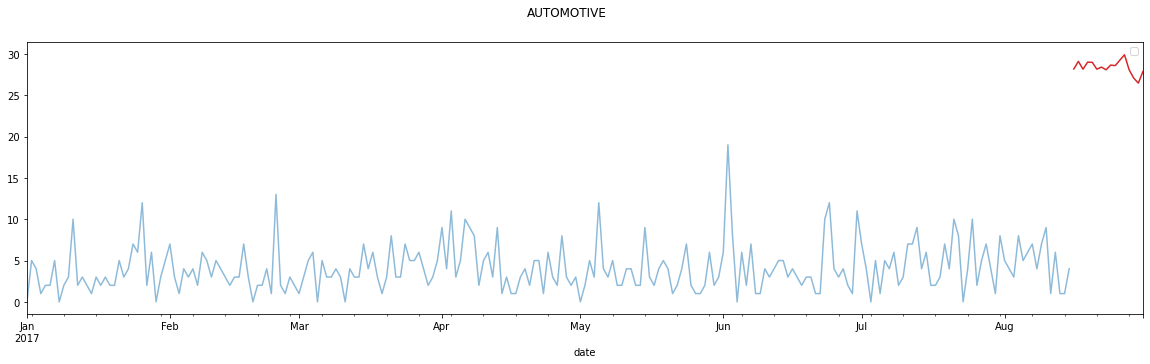

In [740]:
graphicx(0)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


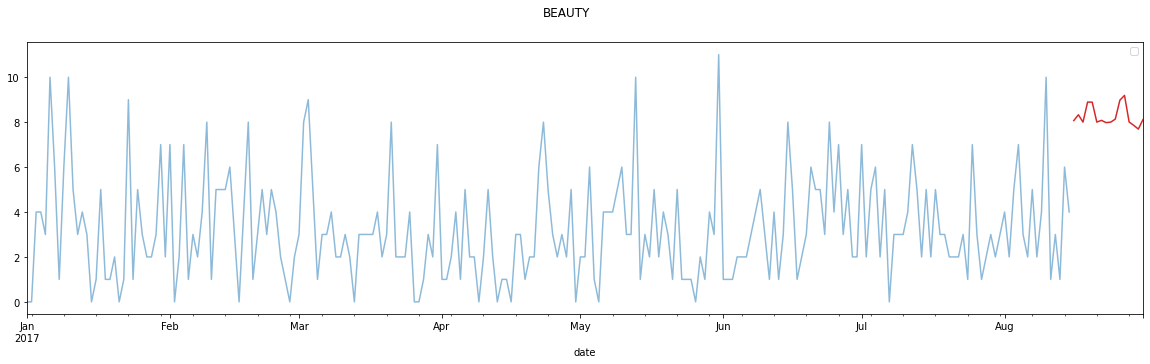

In [741]:
graphicx(2)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


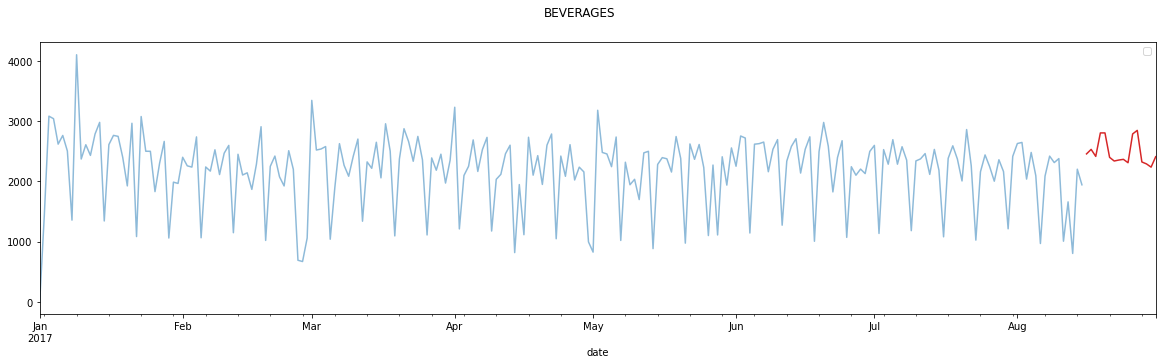

In [742]:
graphicx(3)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


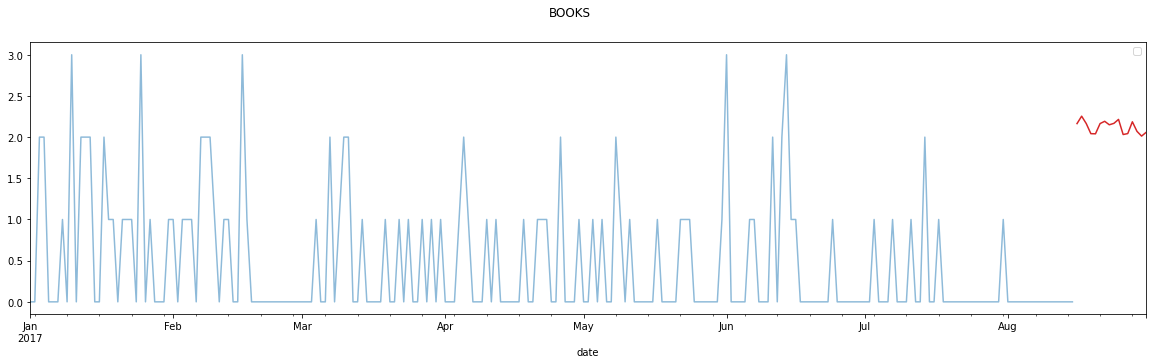

In [743]:
graphicx(4)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


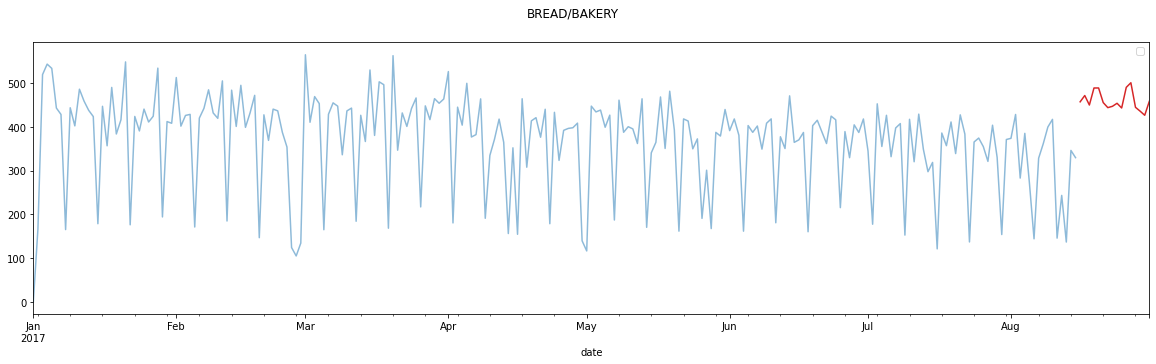

In [744]:
graphicx(5)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


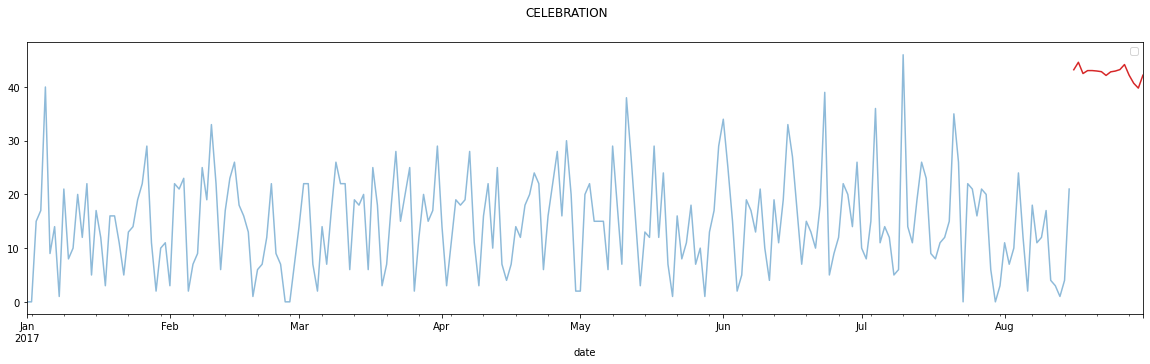

In [745]:
graphicx(6)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


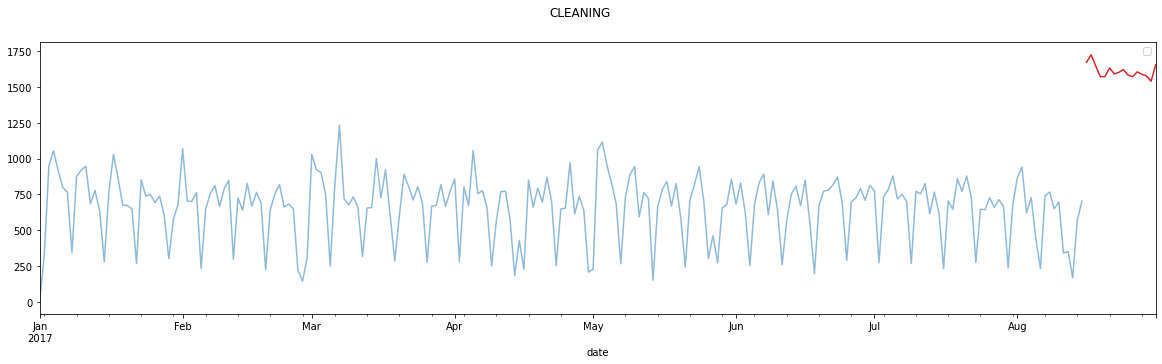

In [746]:
graphicx(7)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


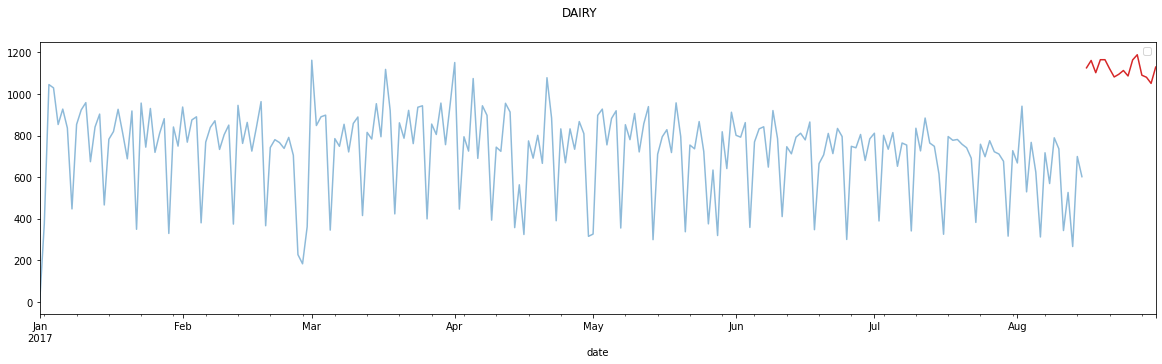

In [747]:
graphicx(8)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


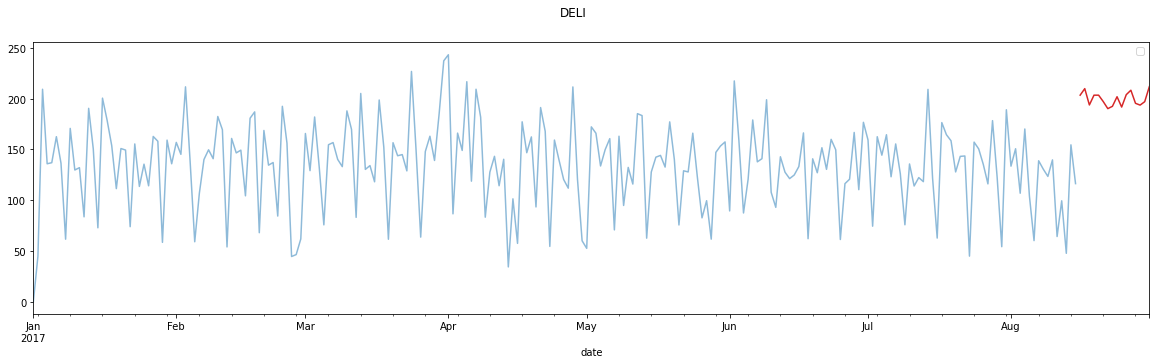

In [748]:
graphicx(9)

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes


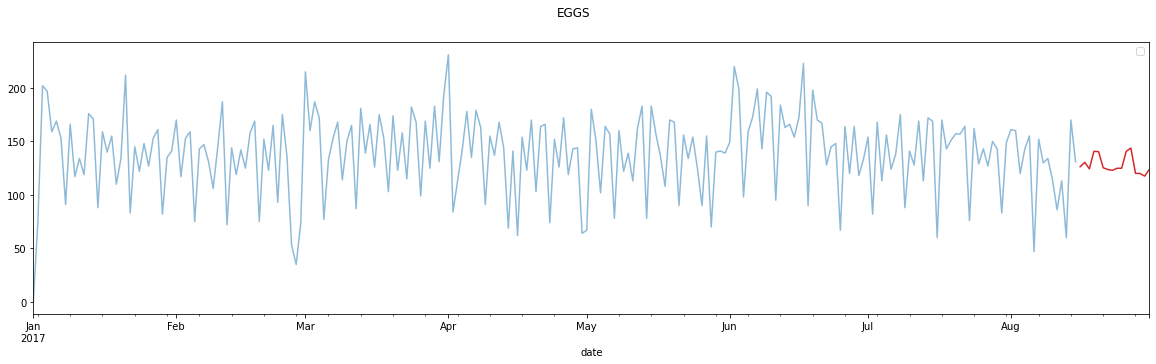

In [749]:
graphicx(10)